DEA-AHP/GS - DEA GAUSSIAN AHP HYBRID METHOD


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr


In [2]:
file_path = r"DADOS testes AWS.csv"
df = pd.read_csv(file_path, sep=';')

df

,Config (DMUs),V.M Amount (WorldPress),Test Time (min),ramp up,Users,%95 (ms),Cost
0,Locust t3.small - DB t3.small - VM 2t3.small,2,3.20,10,50,8100,0.08
1,Locust t3.small - DB t3.small - VM 3t3.small,3,3.30,10,50,6400,0.10
2,Locust t3.medium- DB t3.medium- VM 2t3.medium,2,3.40,10,50,8200,0.17
3,Locust t3.large - DB t3.large- VM 3t3.large,3,3.50,10,50,3600,0.42
4,Locust t3.large - DB t3.large- VM 3t3.large r20,3,3.60,20,100,13000,0.42
5,Locust t3.large - DB t3.large- VM 3t3.large r25,3,3.70,25,125,11000,0.42
6,Locust t3.large - DB t3.medium- VM 4t3.large,4,3.80,10,50,3800,0.46
7,Locust t3.large - DB t3.medium- VM 4t3.large r20,4,3.90,20,100,7600,0.46
8,Locust t3.large - DB t3.medium- VM 2t3.xlarge,2,3.10,10,50,2300,0.46
9,Locust t3.large - DB t3.medium- VM 2t3.xlarger20,2,3.11,20,100,4500,0.46


EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Config (DMUs)            11 non-null     object 
 1   V.M Amount (WorldPress)  11 non-null     int64  
 2   Test Time (min)          11 non-null     float64
 3   ramp up                  11 non-null     int64  
 4   Users                    11 non-null     int64  
 5   %95 (ms)                 11 non-null     int64  
 6    Cost                    11 non-null     float64
dtypes: float64(2), int64(4), object(1)
memory usage: 748.0+ bytes


In [4]:
df.describe()

,V.M Amount (WorldPress),Test Time (min),ramp up,Users,%95 (ms),Cost
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,2.727273,3.430000,15.454545,77.272727,7045.454545,0.355455
std,0.786245,0.290276,6.501748,32.508740,3308.886108,0.155780
min,2.000000,3.100000,10.000000,50.000000,2300.000000,0.080000
25%,2.000000,3.160000,10.000000,50.000000,4150.000000,0.295000
50%,3.000000,3.400000,10.000000,50.000000,7600.000000,0.420000
75%,3.000000,3.650000,20.000000,100.000000,8600.000000,0.460000
max,4.000000,3.900000,25.000000,125.000000,13000.000000,0.460000


In [5]:
# Correlation matrix
corr_matrix = df.select_dtypes(include=np.number).corr() # Selecionar somente colunas com dados numéricos
corr_matrix

,V.M Amount (WorldPress),Test Time (min),ramp up,Users,%95 (ms),Cost
V.M Amount (WorldPress),1.000000,0.902606,0.026675,0.026675,0.016773,0.290954
Test Time (min),0.902606,1.000000,0.137763,0.137763,0.258202,0.270904
ramp up,0.026675,0.137763,1.000000,1.000000,0.596242,0.520589
Users,0.026675,0.137763,1.000000,1.000000,0.596242,0.520589
%95 (ms),0.016773,0.258202,0.596242,0.596242,1.000000,-0.147777
Cost,0.290954,0.270904,0.520589,0.520589,-0.147777,1.000000


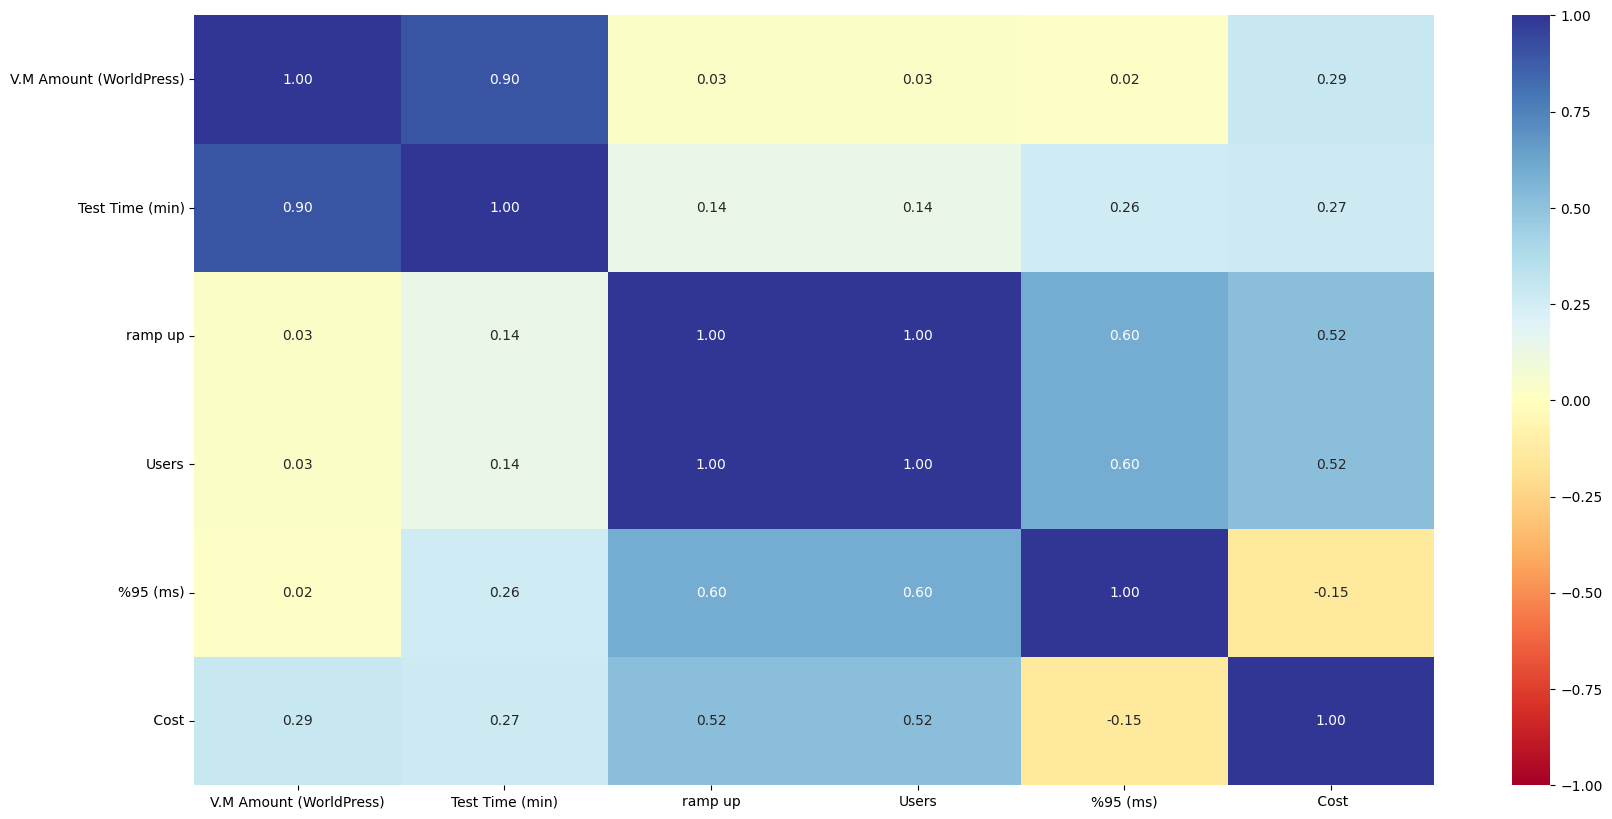

In [6]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, fmt=".2f", cmap="RdYlBu", cbar=True)
plt.show()

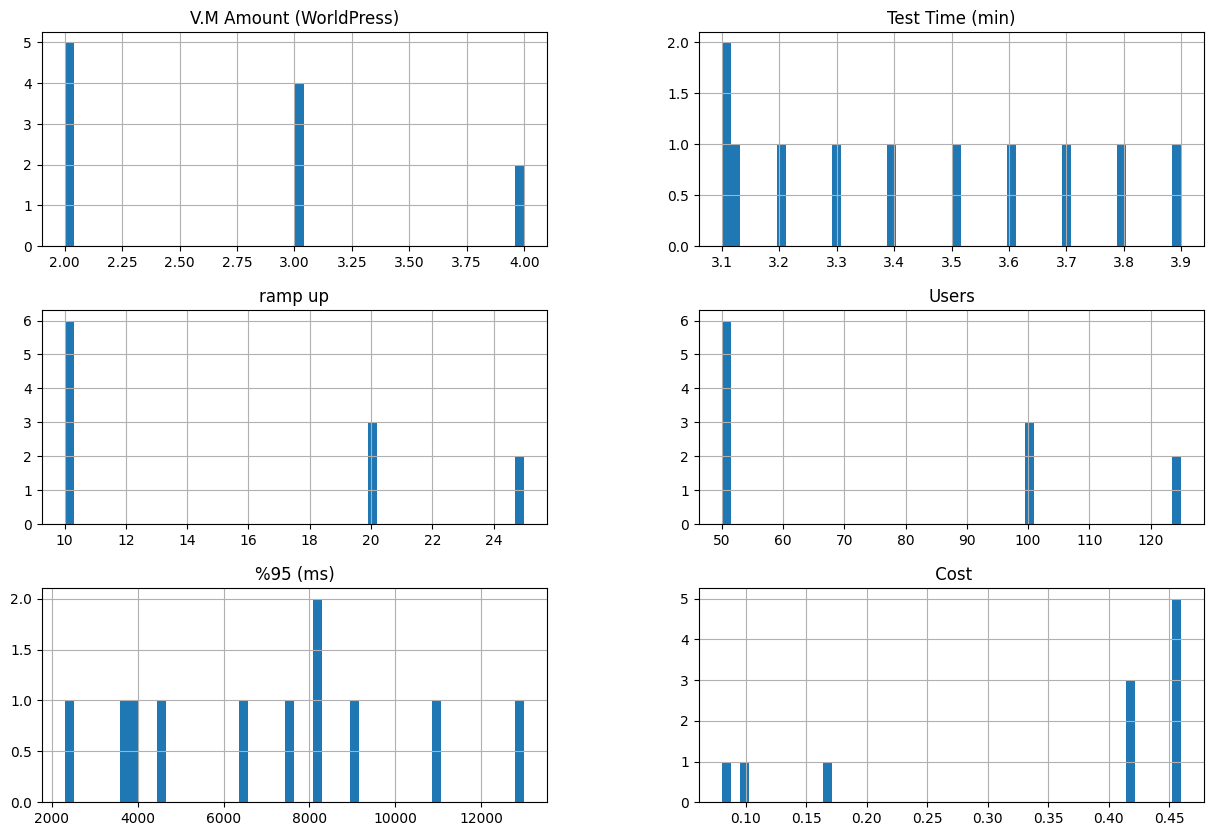

In [7]:
g = df.hist(bins = 50, figsize = (15, 10))

AHP/GS Stage

In [8]:
# Group the data by the 'DMUs' column and sum the input and output values
df_grouped = df.groupby('Config (DMUs)').sum().reset_index()

# Select all relevant columns
valores_norm = ['V.M Amount (WorldPress)', 'Test Time (min)', ' Cost', 'ramp up', 'Users', '%95 (ms)']

# Function to calculate normalized Gaussian factors
def calcular_fator_gaussiano_normalizado(df, columns):
    media = df[columns].mean()
    desvio_padrao = df[columns].std()
    fator_gaussiano = desvio_padrao / media
    return fator_gaussiano / fator_gaussiano.max()

# Calculate the normalized Gaussian factor
fator_gaussiano_normalizado = calcular_fator_gaussiano_normalizado(df_grouped, valores_norm)

print("Normalized Gaussian Factor (weights) for All Columns:")
print(fator_gaussiano_normalizado)

# Calcular a matriz de correlação de Pearson
corr_matrix = df_grouped[valores_norm].corr()
coef_pearson = corr_matrix.mean().mean()

print("\nPearson Correction Factor:")
print(coef_pearson)

# Ajustar os pesos apenas se correlação for >= 0.8
if coef_pearson >= 0.8:
    pesos_ajustados = fator_gaussiano_normalizado * coef_pearson
    print("\nUsing adjusted weights (Pearson-based):")
else:
    pesos_ajustados = fator_gaussiano_normalizado
    print("\nLow correlation detected. Using original normalized Gaussian weights:")

print(pesos_ajustados)


Normalized Gaussian Factor (weights) for All Columns:
V.M Amount (WorldPress)    0.613842
Test Time (min)            0.180195
 Cost                      0.933155
ramp up                    0.895779
Users                      0.895779
%95 (ms)                   1.000000
dtype: float64

Pearson Correction Factor:
0.45301106918773054

Low correlation detected. Using original normalized Gaussian weights:
V.M Amount (WorldPress)    0.613842
Test Time (min)            0.180195
 Cost                      0.933155
ramp up                    0.895779
Users                      0.895779
%95 (ms)                   1.000000
dtype: float64


DEA Stage

Defining inputs and outputs

In [9]:
import pandas as pd

# Agrupar os dados pelo nome dos DMUs
df_grouped = df.groupby('Config (DMUs)').sum().reset_index()

# Definir colunas de inputs e outputs
input_cols = ['V.M Amount (WorldPress)', 'Test Time (min)', ' Cost', 'ramp up']
output_cols = ['Users', '%95 (ms)']

# Combinar todos os critérios para facilitar a normalização
valores_norm = input_cols + output_cols

# Função para coletar a monotonicidade dos critérios
def get_monotonicity(valores_norm):
    monotonicity = []
    print("\nPor favor, defina a monotonicidade para cada critério. Digite 'max' para maximizar ou 'min' para minimizar.")
    for criterion in valores_norm:
        while True:
            monotonicity_input = input(f"Monotonicidade para o critério '{criterion}' ('max' ou 'min'): ").strip().lower()
            if monotonicity_input in ['max', 'min']:
                monotonicity.append(monotonicity_input)
                break
            else:
                print("Entrada inválida. Digite 'max' ou 'min'.")
    return monotonicity

# Coletar a monotonicidade do usuário
monotonicity = get_monotonicity(valores_norm)

# Normalizar os dados de acordo com a monotonicidade
df_normalized = df_grouped.copy()
for idx, criterion in enumerate(valores_norm):
    if monotonicity[idx] == 'max':
        df_normalized[criterion] = df_grouped[criterion] / df_grouped[criterion].max()
    elif monotonicity[idx] == 'min':
        df_normalized[criterion] = 1 / df_grouped[criterion]

# Separar os inputs e outputs normalizados
inputs_normalized = df_normalized[input_cols]
outputs_normalized = df_normalized[output_cols]

# Mostrar os dados para verificação
print("\nNormalized Inputs:")
print(inputs_normalized)

print("\nNormalized Outputs:")
print(outputs_normalized)

# Definir os pesos como os próprios valores normalizados (você pode alterar isso depois)
input_weights = inputs_normalized
output_weights = outputs_normalized

print("\nInput Weights:")
print(input_weights)

print("\nOutput Weights:")
print(output_weights)



Por favor, defina a monotonicidade para cada critério. Digite 'max' para maximizar ou 'min' para minimizar.

Normalized Inputs:
    V.M Amount (WorldPress)  Test Time (min)       Cost  ramp up
0                      0.75         0.897436   2.380952      0.4
1                      0.75         0.923077   2.380952      0.8
2                      0.75         0.948718   2.380952      1.0
3                      0.50         0.794872   2.173913      0.4
4                      0.50         0.800000   2.173913      1.0
5                      0.50         0.797436   2.173913      0.8
6                      1.00         0.974359   2.173913      0.4
7                      1.00         1.000000   2.173913      0.8
8                      0.50         0.871795   5.882353      0.4
9                      0.50         0.820513  12.500000      0.4
10                     0.75         0.846154  10.000000      0.4

Normalized Outputs:
    Users  %95 (ms)
0     0.4  0.000278
1     0.8  0.000077
2     1.0 

Weighting inputs and outputs

In [10]:
# Aplicar os pesos nos inputs e outputs normalizados
inputs_weighted = inputs_normalized * input_weights
outputs_weighted = outputs_normalized * output_weights

print("\nInputs weighted:")
print(inputs_weighted)
print("\nOutputs weighted:")
print(outputs_weighted)


Inputs weighted:
    V.M Amount (WorldPress)  Test Time (min)        Cost  ramp up
0                    0.5625         0.805391    5.668934     0.16
1                    0.5625         0.852071    5.668934     0.64
2                    0.5625         0.900066    5.668934     1.00
3                    0.2500         0.631821    4.725898     0.16
4                    0.2500         0.640000    4.725898     1.00
5                    0.2500         0.635904    4.725898     0.64
6                    1.0000         0.949375    4.725898     0.16
7                    1.0000         1.000000    4.725898     0.64
8                    0.2500         0.760026   34.602076     0.16
9                    0.2500         0.673241  156.250000     0.16
10                   0.5625         0.715976  100.000000     0.16

Outputs weighted:
    Users      %95 (ms)
0    0.16  7.716049e-08
1    0.64  5.917160e-09
2    1.00  8.264463e-09
3    0.16  1.890359e-07
4    1.00  1.234568e-08
5    0.64  4.938272e-08
6  

In [11]:
# List to store DMUs, efficiencies, weighted inputs, and weighted outputs
n_dmus = df_grouped.shape[0]  # Number of DMUs
efficiency_scores = []       # List to store efficiency scores
weighted_inputs_list = []    # List to store weighted inputs
weighted_outputs_list = []   # List to store weighted outputs

# Calculate efficiency for each DMU
for i in range(n_dmus):
    # Sum weighted inputs and outputs for DMU i
    weighted_sum_inputs = np.sum(inputs_weighted.iloc[i, :])   # Weighted sum of inputs
    weighted_sum_outputs = np.sum(outputs_weighted.iloc[i, :]) # Weighted sum of outputs

    # Calculate efficiency as the ratio between weighted outputs and weighted inputs
    efficiency = weighted_sum_outputs / weighted_sum_inputs

    # Store results in the respective lists
    efficiency_scores.append(efficiency)
    weighted_inputs_list.append(weighted_sum_inputs)
    weighted_outputs_list.append(weighted_sum_outputs)

# Convert lists to arrays for easier handling
efficiency_scores = np.array(efficiency_scores)
weighted_inputs_list = np.array(weighted_inputs_list)
weighted_outputs_list = np.array(weighted_outputs_list)

# Create a DataFrame with the results
df_results = pd.DataFrame({
    'Criteria': df_grouped['Config (DMUs)'],   # DMU names
    'Weighted Inputs': weighted_inputs_list,     # Weighted inputs
    'Weighted Outputs': weighted_outputs_list,   # Weighted outputs
    'Efficiency': efficiency_scores              # Efficiency scores
})

# Normalize efficiencies to obtain "Relative Efficiency"
max_efficiency = np.max(efficiency_scores)  # Best efficiency score
df_results['Relative Efficiency'] = df_results['Efficiency'] / max_efficiency  # Relative efficiency scaling

# Sort DMUs by efficiency ranking
df_results = df_results.sort_values(by='Efficiency', ascending=False)  # Sort by efficiency (descending)
df_results['Ranking'] = df_results['Efficiency'].rank(ascending=False, method='min').astype(int)  # Assign rankings
df_results = df_results[['Criteria', 'Weighted Inputs', 'Weighted Outputs', 'Efficiency', 'Relative Efficiency', 'Ranking']]  # Reorder columns

# Display the results table with ranking
df_results = df_results.reset_index(drop=True)
df_results

,Criteria,Weighted Inputs,Weighted Outputs,Efficiency,Relative Efficiency,Ranking
0,Locust t3.large - DB t3.medium- VM 2t3.xlarge r25,6.615898,1.00,0.151151,1.000000,1
1,Locust t3.large - DB t3.large- VM 3t3.large r25,8.131500,1.00,0.122979,0.813613,2
2,Locust t3.large - DB t3.medium- VM 2t3.xlarger20,6.251802,0.64,0.102370,0.677273,3
3,Locust t3.large - DB t3.medium- VM 4t3.large r20,7.365898,0.64,0.086887,0.574835,4
4,Locust t3.large - DB t3.large- VM 3t3.large r20,7.723505,0.64,0.082864,0.548219,5
5,Locust t3.large - DB t3.medium- VM 2t3.xlarge,5.767719,0.16,0.027741,0.183529,6
6,Locust t3.large - DB t3.medium- VM 4t3.large,6.835273,0.16,0.023408,0.154865,7
7,Locust t3.large - DB t3.large- VM 3t3.large,7.196825,0.16,0.022232,0.147085,8
8,Locust t3.medium- DB t3.medium- VM 2t3.medium,35.772102,0.16,0.004473,0.029591,9
9,Locust t3.small - DB t3.small - VM 3t3.small,101.438476,0.16,0.001577,0.010435,10


Plotagem do gráfico (a refinar)

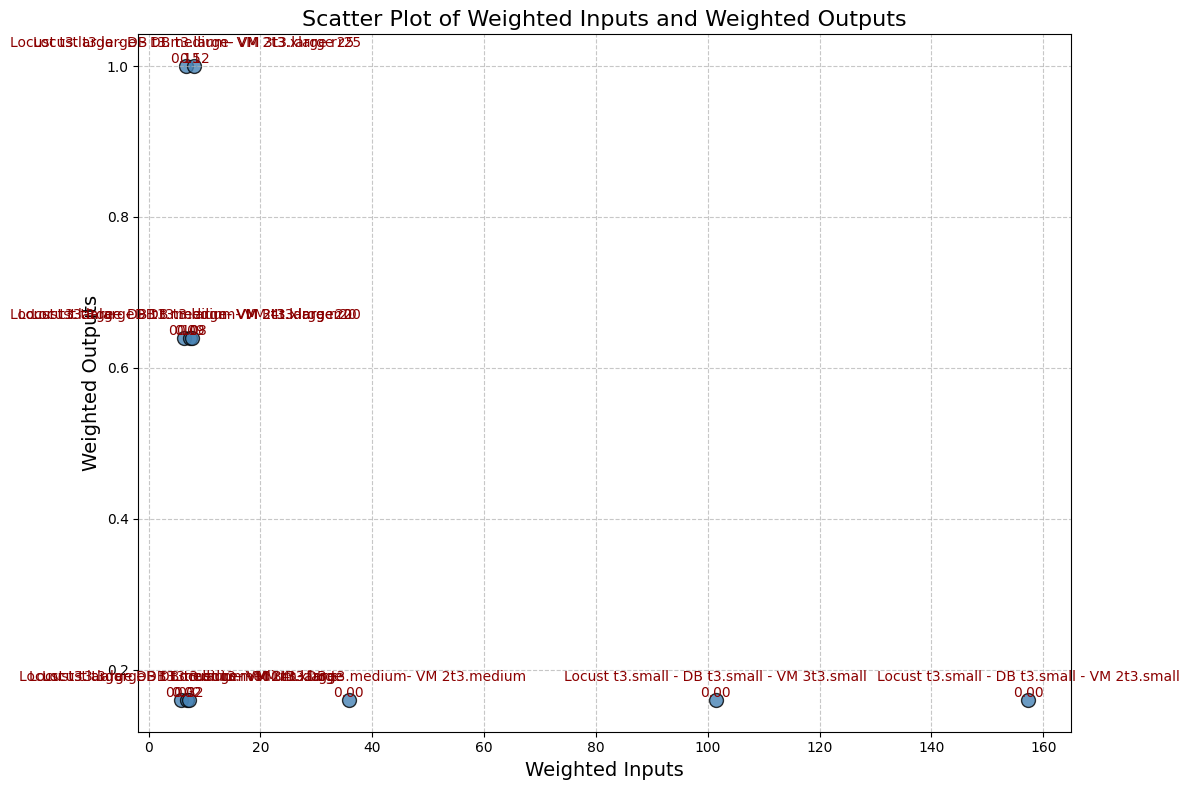

In [12]:
# Scatter plot
plt.figure(figsize=(12, 8))  # Set figure size

# Create the scatter plot
plt.scatter(
    df_results['Weighted Inputs'],   # Weighted Inputs on the X-axis
    df_results['Weighted Outputs'],  # Weighted Outputs on the Y-axis
    s=100,                           # Point size
    alpha=0.8,                       # Point transparency
    color='steelblue',               # Point color
    edgecolors='k'                   # Point border color
)

# Add data labels (DMU and Efficiency)
for i in range(len(df_results)):
    dmu = df_results['Criteria'].iloc[i]      # DMU name
    efficiency = df_results['Efficiency'].iloc[i]  # Efficiency score
    x = df_results['Weighted Inputs'].iloc[i]      # X coordinate
    y = df_results['Weighted Outputs'].iloc[i]     # Y coordinate
    plt.text(
        x, y,
        f'{dmu}\n{efficiency:.2f}',   # DMU name and efficiency (2 decimal places)
        fontsize=10, ha='center', va='bottom', color='darkred'  # Text styling
    )

# Add labels and title
plt.title('Scatter Plot of Weighted Inputs and Weighted Outputs', fontsize=16)  # Title
plt.xlabel('Weighted Inputs', fontsize=14)  # X-axis label
plt.ylabel('Weighted Outputs', fontsize=14)  # Y-axis label

# Adjust grid for better visualization
plt.grid(True, linestyle='--', alpha=0.7)  # Dashed grid lines

# Display the plot with proper layout
plt.tight_layout()
plt.show()
